## Zomato_Dataset_Cleaning 

> The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing stage of the data analysis as many machine learning algorithms do not support missing values.
> Zomato dataset is an appropriate dataset to get your hands dirty and learn the various techniques and methodology to analyse missing values and how to fix them.
> Through this notebook I have attempted to use some of the useful methods to analyse missing values in the data and apply required imputation techniques to fill them.  

In [1]:
# Importing neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('zomato.csv',sep=',')

## 1. Exploring the Dataset

In [3]:
#Exploring the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.shape

(51717, 17)

## 2. Cleaning data

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
# Deleting unwanted columns
# Here, url, phone, and address is not needed for any analysis, so can be dropped 

df_1=df.drop(['url','phone','address'], axis=1)

In [8]:
df_1.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
# Renaming columns

df_1=df_1.rename(columns={'rate':'rating','approx_cost(for two people)':'cost',
                          'listed_in(type)':'type','listed_in(city)':'city','menu_item':'menu'})
df_1.columns

Index(['name', 'online_order', 'book_table', 'rating', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'reviews_list', 'menu',
       'type', 'city'],
      dtype='object')

In [10]:
# Correcting data types

df_1['cost'] = df_1['cost'].astype(str)
#Removing "," or "." from the strings
df_1['cost'] = df_1['cost'].apply(lambda x: x.replace(',','.'))
#Converting string into float
df_1['cost'] = df_1['cost'].astype(float)

df_1.info()

#df_1['cost'] = df_1['cost'].astype(float)
#df_1['cost'] = pd.to_numeric(df_1['cost'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rating        43942 non-null  object 
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   dish_liked    23639 non-null  object 
 8   cuisines      51672 non-null  object 
 9   cost          51371 non-null  float64
 10  reviews_list  51717 non-null  object 
 11  menu          51717 non-null  object 
 12  type          51717 non-null  object 
 13  city          51717 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.5+ MB


In [11]:
# Removing '/5' from ratings

df_1['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
# Firstly removing 'NEW' and '-'

df_1 = df_1.loc[df_1.rating !='NEW']
df_1 = df_1.loc[df_1.rating !='-'].reset_index(drop=True)

#Removing slash

remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df_1.rating = df_1.rating.apply(remove_slash).str.strip().astype('float')

#Checking the changes in rating column

df_1['rating'].head(20)

C:\Users\sachi\AppData\Local\Temp\ipykernel_15996\2743682165.py:8: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x


0     4.1
1     4.1
2     3.8
3     3.7
4     3.8
5     3.8
6     3.6
7     4.6
8     4.0
9     4.2
10    4.1
11    4.2
12    4.2
13    4.0
14    3.8
15    3.8
16    3.9
17    3.8
18    3.9
19    3.1
Name: rating, dtype: float64

In [13]:
# Removing values with only "[]" from reviews_list 

df_1['reviews_list'].replace('[]', np.nan, inplace=True)

In [14]:
df_1.head()

,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          49440 non-null  object 
 1   online_order  49440 non-null  object 
 2   book_table    49440 non-null  object 
 3   rating        41665 non-null  float64
 4   votes         49440 non-null  int64  
 5   location      49419 non-null  object 
 6   rest_type     49215 non-null  object 
 7   dish_liked    23492 non-null  object 
 8   cuisines      49395 non-null  object 
 9   cost          49099 non-null  float64
 10  reviews_list  43045 non-null  object 
 11  menu          49440 non-null  object 
 12  type          49440 non-null  object 
 13  city          49440 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 5.3+ MB


## 3. Missing Value Analysis

In [16]:
#Missing value analysis

df_1.isnull().sum()

name                0
online_order        0
book_table          0
rating           7775
votes               0
location           21
rest_type         225
dish_liked      25948
cuisines           45
cost              341
reviews_list     6395
menu                0
type                0
city                0
dtype: int64

In [17]:
df_1.isnull().mean()*100

name             0.000000
online_order     0.000000
book_table       0.000000
rating          15.726133
votes            0.000000
location         0.042476
rest_type        0.455097
dish_liked      52.483819
cuisines         0.091019
cost             0.689725
reviews_list    12.934871
menu             0.000000
type             0.000000
city             0.000000
dtype: float64

> dish_liked has maximum missing values i.e. 25948, alomost 52% of the values, followed by Rating column with 7775, almost 15.8% of the values followed by reviews_list 13%.

In [18]:
import missingno as msno

<AxesSubplot:>

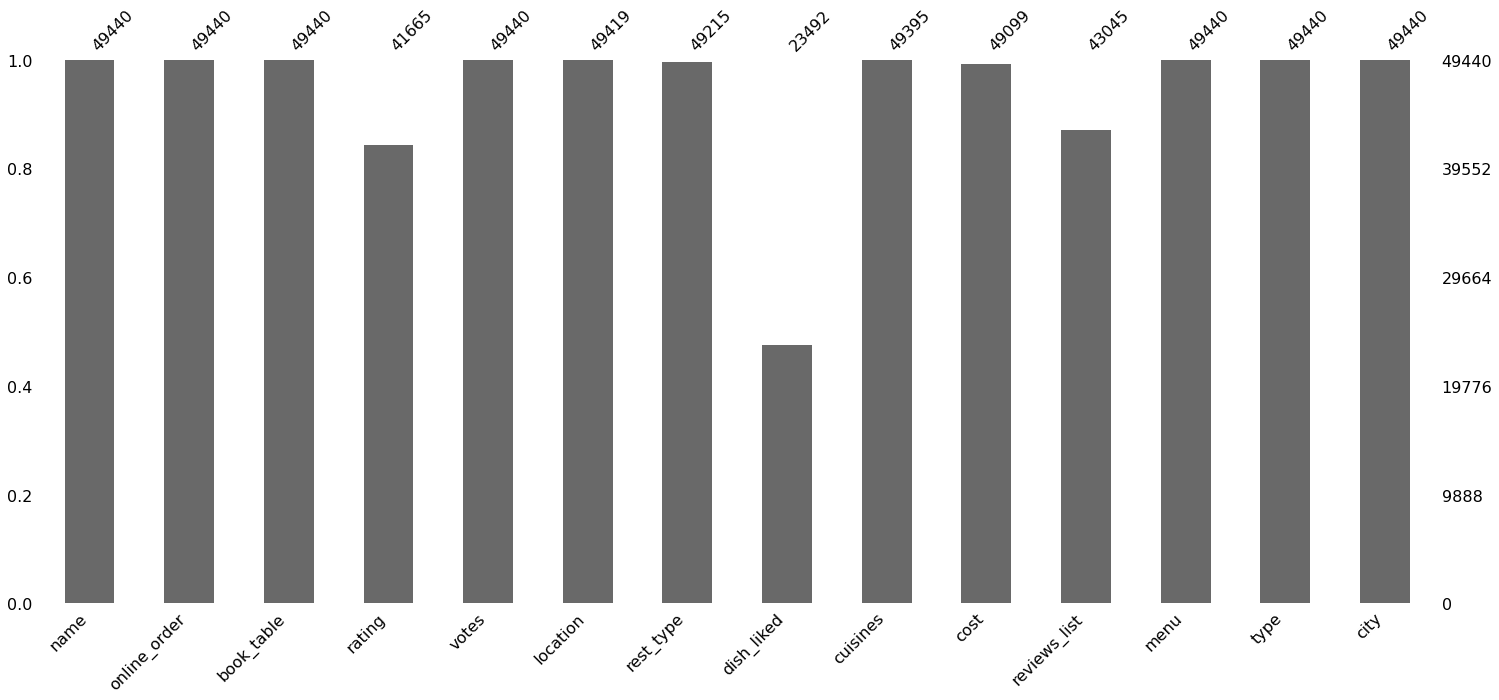

In [19]:
#using missingno library to explore the missingness in dataset
#visualizing data completeness

#Bar chart
msno.bar(df_1)

> Height of each bar indicates how complete the column is and how many null values are present. y-axis scale ranges from zero to one where one represents one hundred percent data completeness. If the bar is less than one, it indicates that we have missing values within that column. Here, Most of the columns are complete but dish_liked, rating, reviews_list, location, rest_type, cuisine and cost are incomplete, Especially dish_liked which is 0.45, rating which is only 0.85 (approx) complete. Height of the bars shows how complete the column is.

<AxesSubplot:>

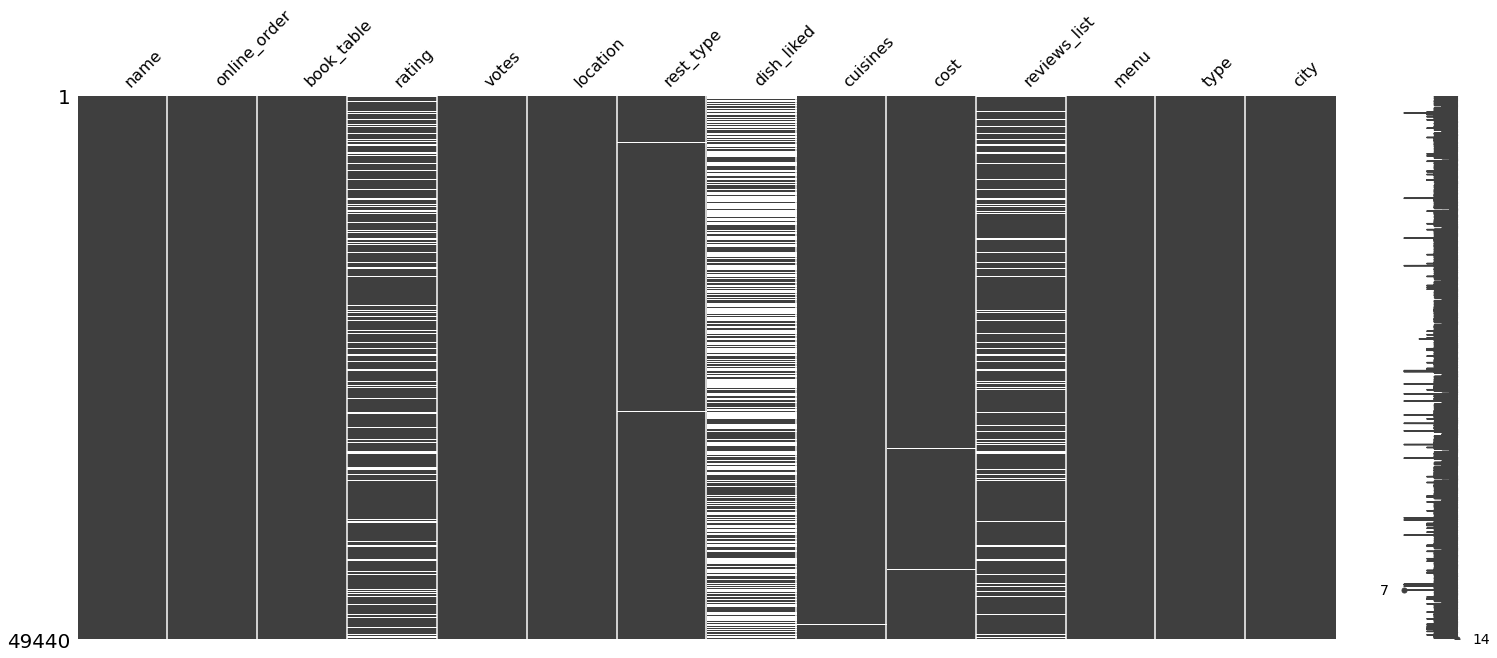

In [20]:
#Matrix plot

msno.matrix(df_1)

> Matrix plot provides color fill for each column. When data is present, plot is shaded in grey and when its absent, row values are displayed in white. This plot particularly helps in viewing how the missing data is distributed within the dataframe. Sparkline chart on the left ranges from zero on the left to total number of columns (14 in this case) on the right. When a row has no missing values in any column it will be at the maximum right position. And When missing values starts to increase, the line will move towards the left. 

<AxesSubplot:>

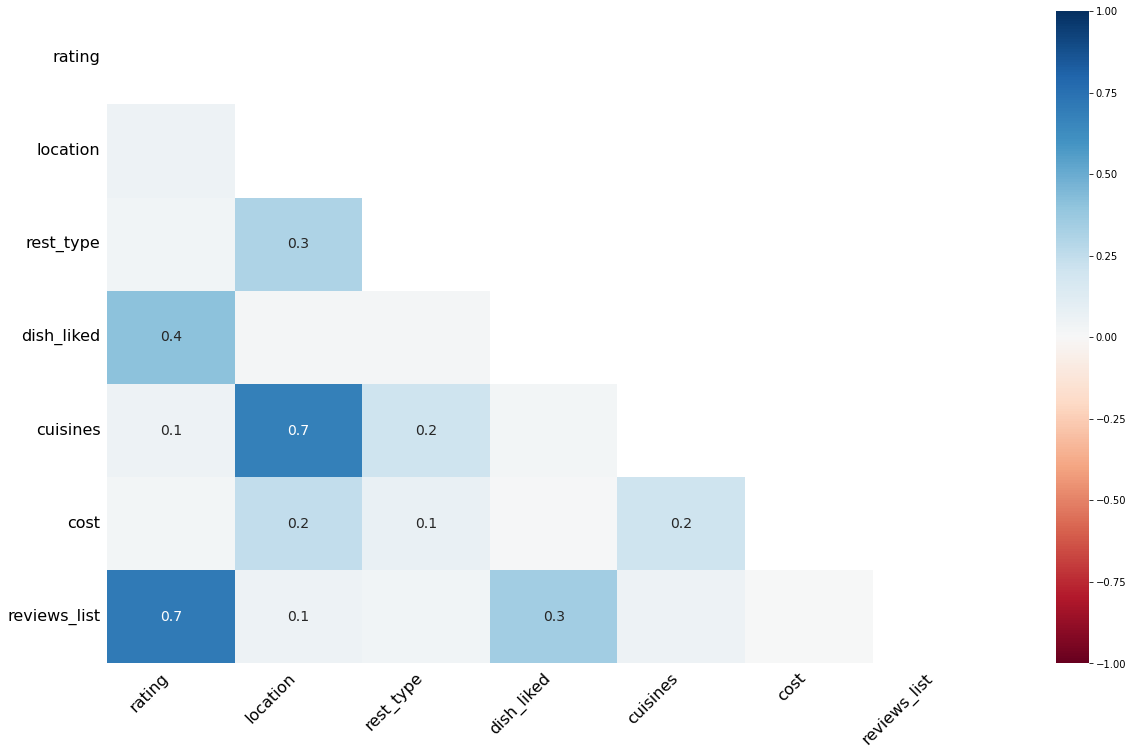

In [21]:
#Heat Map

msno.heatmap(df_1)

> Heat map is used to identify correlations of the nullity between each of the columns. i.e. if there is any relationship in the presence of null values between one variable and the other. Positive value of 0.7 between cuisines and location indictaes that the presence of null values in one is positively correlated with other. Similar is the case with reviews_list and rating having positive correlation of 0.7 for nullity.

<AxesSubplot:>

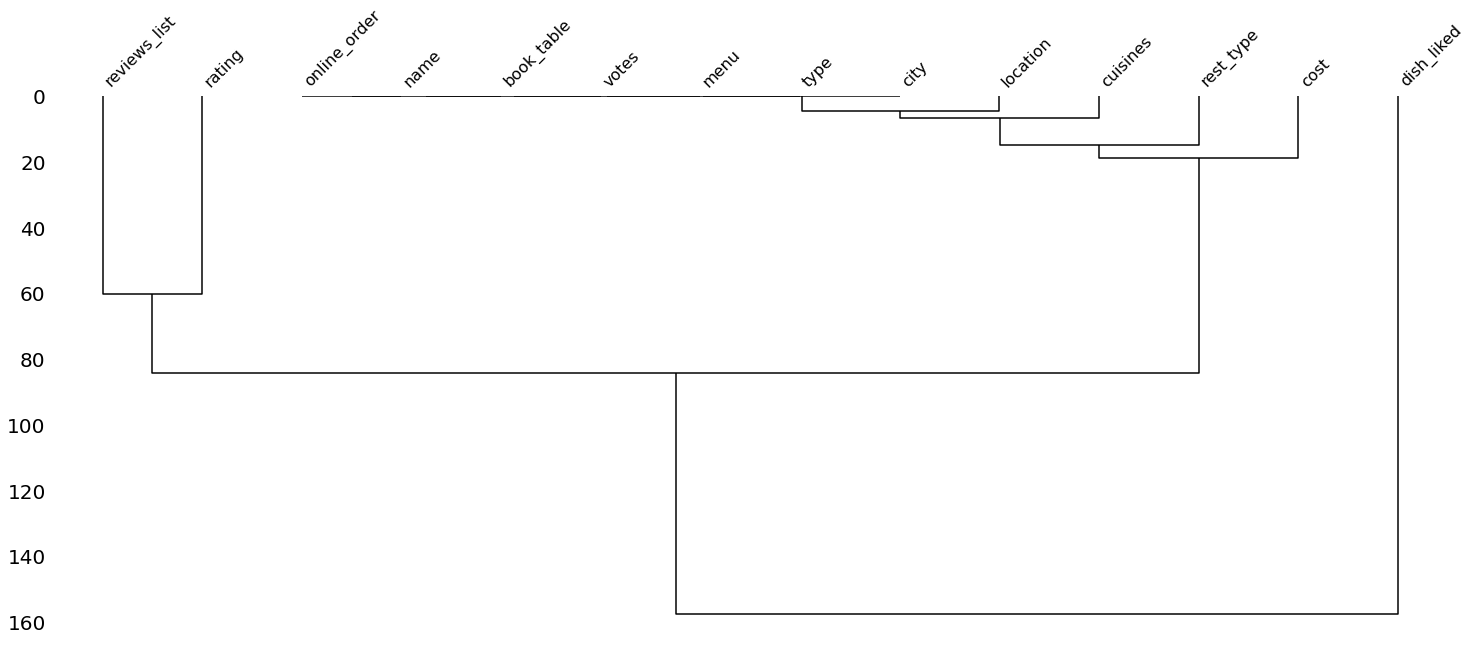

In [22]:
#Dendrogram

msno.dendrogram(df_1)

> Dendrogram is a graph generated through hierarichal clustering and groups together columns that have strong correlations.The less seperated the columns in the graph, more likely the null values can be correlated between those columns. And vice-versa. Reviews_list and rating has strong correlation.

In [23]:
# Analysing common null values between variables using crosstabs
# Introducing new variables for crosstab analysis

df_1['rest_type_na'] = np.where(df_1.rest_type.notna(), 0, 1)
df_1['dish_liked_na'] = np.where(df_1.dish_liked.notna(), 0, 1)
df_1['cost_na'] = np.where(df_1.cost.notna(), 0, 1)
df_1['rating_na'] = np.where(df_1.rating.notna(), 0, 1)
df_1['reviews_list_na'] = np.where(df_1.reviews_list.notna(), 0, 1)
df_1['menu_na'] = np.where(df_1.menu.notna(), 0, 1)

In [24]:
pd.crosstab(df_1.menu_na, df_1.dish_liked_na, dropna=False)

dish_liked_na,0,1
menu_na,,
0,23492,25948


In [25]:
pd.crosstab(df_1.cost_na, df_1.rest_type_na, dropna=False)

rest_type_na,0,1
cost_na,,
0,48897,202
1,318,23


In [26]:
pd.crosstab(df_1.rating_na, df_1.reviews_list_na, dropna=False)

reviews_list_na,0,1
rating_na,,
0,40544,1121
1,2501,5274


> 5274 missing values are common in reviews list and rating. dish_liked has more than 50% missing values, and it has no specific relationship with other variables in terms of null values. So considering it as MCAR/MAR (Missing at random), we can drop the entire column. location and cuisines have very small number of missing values less than 1%, so we can delete those rows entirely. As observed from the heatmap and cross tabs, there is strong relationship between the null values of reviews_list and rating. So, Null values in reviews_list and rating can be considered as MNAR (Missing not at random). In general it can be inferred that the cases where individual reviews were missing, the overall rating is also missing. Since, reviews_list is a text column, it can be deleted from analysis, but rating being an important numerical variable needs to imputed with some special technique.

## 4. Handling missing values and required Imputations

In [27]:
# Dropping dish_liked and reviews_list column

df_1 = df_1.drop(['reviews_list','dish_liked'], axis=1)

In [28]:
# Imputing missing value in rating using simple imputer from sklearn library

df_1['rating'].describe()

# Because mean is equal to median in case of rating, so missing values can be imputed with the average value for rating

count    41665.000000
mean         3.700449
std          0.440513
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rating, dtype: float64

In [29]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(df_1[['rating']])
df_1['rating'] = imp.transform(df_1[['rating']]).ravel()

In [30]:
df_1['cost'].describe()

count    49099.000000
mean       361.297400
std        231.111464
min          1.000000
25%        200.000000
50%        350.000000
75%        500.000000
max        950.000000
Name: cost, dtype: float64

In [31]:
# Here mean is greater than median, so missing values should be imputed using median value

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(df_1[['cost']])
df_1['cost'] = imp.transform(df_1[['cost']]).ravel()

In [32]:
#Checking remaining null values

df_1.isnull().sum()

name                 0
online_order         0
book_table           0
rating               0
votes                0
location            21
rest_type          225
cuisines            45
cost                 0
menu                 0
type                 0
city                 0
rest_type_na         0
dish_liked_na        0
cost_na              0
rating_na            0
reviews_list_na      0
menu_na              0
dtype: int64

In [33]:
#Imputing the categorical variable 'rest_type' using most frequent values

In [34]:
df_1['rest_type'].value_counts()

Quick Bites                   18003
Casual Dining                 10066
Cafe                           3610
Delivery                       2493
Dessert Parlor                 2188
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [35]:
df_1['rest_type']=df_1['rest_type'].fillna('Quick Bites')

In [36]:
#Finally dropping rows with Null values left in location and cuisines

df_1=df_1.dropna()

#Checking if any null values left

df_1.isnull().sum()

name               0
online_order       0
book_table         0
rating             0
votes              0
location           0
rest_type          0
cuisines           0
cost               0
menu               0
type               0
city               0
rest_type_na       0
dish_liked_na      0
cost_na            0
rating_na          0
reviews_list_na    0
menu_na            0
dtype: int64

In [37]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49395 entries, 0 to 49439
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             49395 non-null  object 
 1   online_order     49395 non-null  object 
 2   book_table       49395 non-null  object 
 3   rating           49395 non-null  float64
 4   votes            49395 non-null  int64  
 5   location         49395 non-null  object 
 6   rest_type        49395 non-null  object 
 7   cuisines         49395 non-null  object 
 8   cost             49395 non-null  float64
 9   menu             49395 non-null  object 
 10  type             49395 non-null  object 
 11  city             49395 non-null  object 
 12  rest_type_na     49395 non-null  int32  
 13  dish_liked_na    49395 non-null  int32  
 14  cost_na          49395 non-null  int32  
 15  rating_na        49395 non-null  int32  
 16  reviews_list_na  49395 non-null  int32  
 17  menu_na     

## 5. Exploratory Data Analysis & Visualizations

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

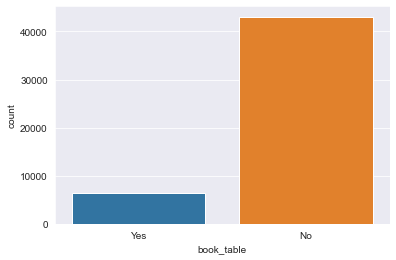

In [39]:
# Comparing the count of booked tables

z = sns.countplot(x='book_table', data=df_1)

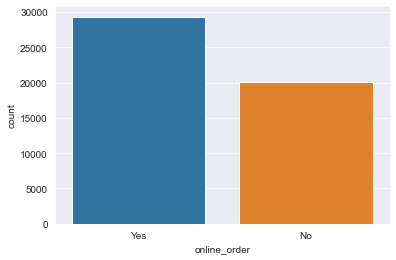

In [40]:
# Comparing the count of online and offline orders

z = sns.countplot(x='online_order', data=df_1)

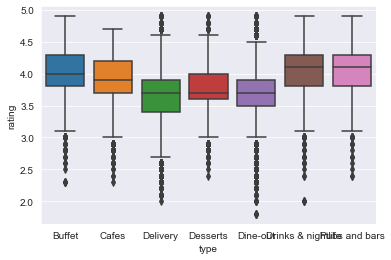

In [41]:
# Analysing distribution of ratings 'resto_type' wise

z = sns.boxplot(data=df_1, x='type', y='rating')

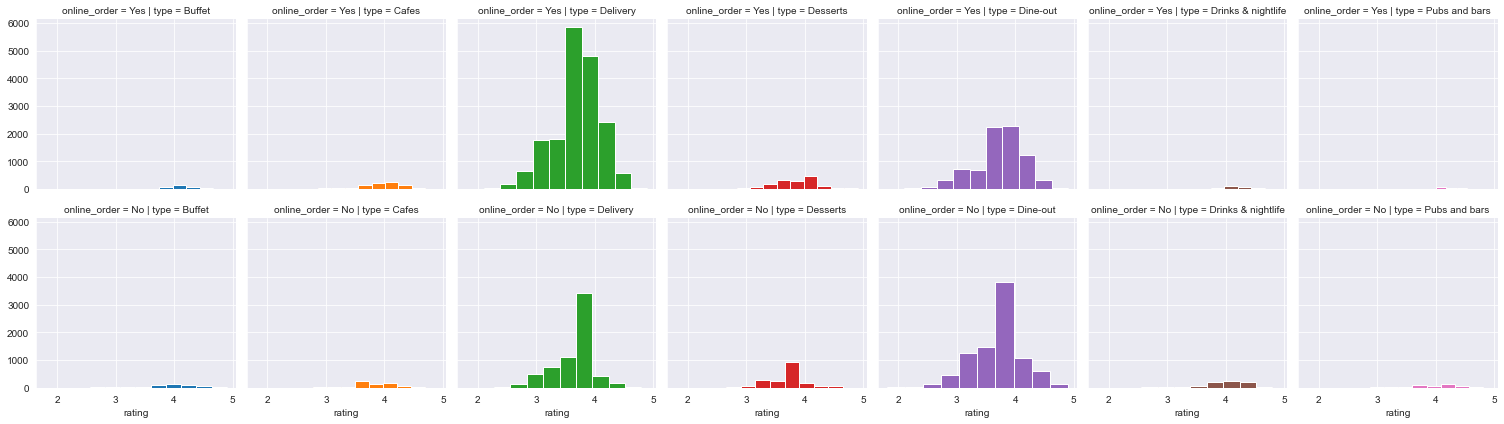

In [42]:
g = sns.FacetGrid(df_1, row='online_order', col='type', hue='type')
g = g.map(plt.hist, 'rating')

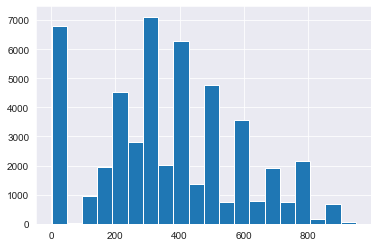

In [43]:
# Distribution of order_counts cost wise

n = plt.hist(df_1.cost, bins=20)

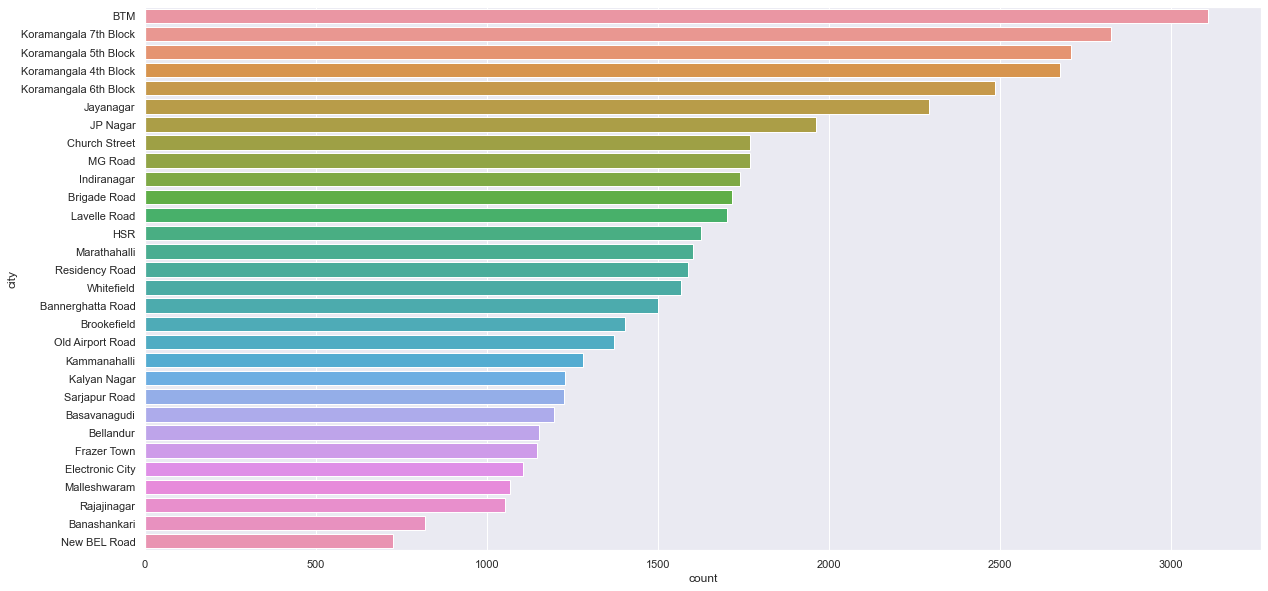

In [44]:
# Analysing the order density city wise

sns.set(rc={'figure.figsize':(20,10)})
s = sns.countplot(y='city', data=df_1, order = df_1['city'].value_counts().index)

> BTM is the most busy city in terms of orders followed by Koramangala. Highest orders are worth 0-50, 300, 400 and 500. Delivery type has been rated most number of times followed by dine out. There is larger proportion of online orders as compared to offline orders.